# Data Merging

To perform the preprocessing of this data, I utilized the EDGAR ABS XML Technical Specification. This specification acts as a data dictionary to understand what the various fields and codes mean. You can find a pdf of this specification in this repository as well as at https://www.sec.gov/info/edgar/specifications/absxml.htm

Older data were snapshots of the performance of the loans at a time period. For the purposes of predicting probability of default, I only need the most recent performance of the loans. I recognize that I could have performed this during collection, but I wanted all the data for other purposes unrelated to this analysis.

First I will filter out the files containing "Lease" or "Leasing". Leases are fundamentally different from car loan originations, so I will not consider them. 

In [25]:
import os
import sys
os.chdir(sys.path[0])
os.chdir('data')

for fname in os.listdir(os.getcwd()):
    if 'Leas' in fname:
        os.remove(os.path.join(os.getcwd(), fname))

What we are left with is 6856 non-lease auto ABS snapshots.

Next, I will remove all but the most recent snapshot for each of the funds. I found automating this process to be more trouble than it was worth due to inconsistent filenames, so I performed this process by manually reviewing each filename in the file system and deleting them. See below for the final list of filenames after this process:

In [26]:
for fname in os.listdir(os.getcwd()):
    print(fname)

2022.01.04_GM Financial Consumer Automobile Receivables Trust 2022-1 Data Tape.csv
2022.01.06_BMW Vehicle Owner Trust 2018-A Data Tape.csv
2022.01.06_BMW Vehicle Owner Trust 2019-A Data Tape.csv
2022.01.06_BMW Vehicle Owner Trust 2020-A Data Tape.csv
2022.01.12_CarMax Auto Owner Trust 2022-1 Data Tape.csv
2022.01.12_Ford Credit Auto Owner Trust 2022-A Data Tape.csv
2022.01.13_CarMax Auto Owner Trust 2022-1 Data Tape.csv
2022.01.14_Carvana Auto Receivables Trust 2020-P1 Data Tape.csv
2022.01.14_Carvana Auto Receivables Trust 2021-N1 Data Tape.csv
2022.01.14_Carvana Auto Receivables Trust 2021-N2 Data Tape.csv
2022.01.14_Carvana Auto Receivables Trust 2021-N3 Data Tape.csv
2022.01.14_Carvana Auto Receivables Trust 2021-N4 Data Tape.csv
2022.01.14_Carvana Auto Receivables Trust 2021-P1 Data Tape.csv
2022.01.14_Carvana Auto Receivables Trust 2021-P2 Data Tape.csv
2022.01.14_Carvana Auto Receivables Trust 2021-P3 Data Tape.csv
2022.01.14_Carvana Auto Receivables Trust 2021-P4 Data Tape.csv


The following are the total unique funds and years using only the snapshots between 1/1/2022 and 2/2/2022.

World Omni Auto Receivables Trust 2018-21  
World Omni Select Auto Trust 2019-21  
Toyota Auto Receivables 2018-22  
Fifth Third Auto Trust 2019  
Exeter Automobile Receivables Trust 2020-21  
Ally Auto Receivables Trust 2018-19  
Harley-Davidson Motorcycle Trust 2019-21  
Hyundai Auto Receivables Trust 2018-21  
Mercedez Benz Auto Receivables Trust 2018-21  
GM Financial Consumer Automobile Receivables Trust 2018-22  
AmeriCredit Automobile Receivables Trust 2017-21  
Volkswagen Auto Loan Enhanced Trust 2018,2020,2021  
Honda Auto Receivables 2018-21  
USAA Auto Owner Trust 2019  
Ford Credit Auto Owner Trust 2018-22  
Nissan Auto Receivables 2017-21  
Carvana Auto Receivables 2020-21  
CarMax Auto Owner Trust 2021-22  
Capital One Prime Auto Receivables Trust 2018-21  
Santander Drive Auto Receivables Trust 2017-21  
Drive Auto Receivables Trust 2017-21  
BMW Vehicle Owner Trust 2018-20  

This leaves us with 21 funds, 4 more than the consumer reports article identified from October 2021.  
https://www.consumerreports.org/car-financing/many-americans-overpay-for-car-loans-a8076436935/

Next we will aggregate these files into a single csv and filter to only the columns needed in our analysis. To start, we will look at a single file to identify the columns of interest:

In [27]:
import pandas as pd
pd.set_option('max_columns', None)
data = pd.read_csv('2022.01.04_GM Financial Consumer Automobile Receivables Trust 2022-1 Data Tape.csv')
data.head()

c:\users\kevin\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (44,45,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,assetTypeNumber,assetNumber,reportingPeriodBeginningDate,reportingPeriodEndingDate,originatorName,originationDate,originalLoanAmount,originalLoanTerm,loanMaturityDate,originalInterestRatePercentage,interestCalculationTypeCode,originalInterestRateTypeCode,originalInterestOnlyTermNumber,originalFirstPaymentDate,underwritingIndicator,gracePeriodNumber,paymentTypeCode,subvented,vehicleManufacturerName,vehicleModelName,vehicleNewUsedCode,vehicleModelYear,vehicleTypeCode,vehicleValueAmount,vehicleValueSourceCode,obligorCreditScoreType,obligorCreditScore,obligorIncomeVerificationLevelCode,obligorEmploymentVerificationCode,coObligorIndicator,paymentToIncomePercentage,obligorGeographicLocation,assetAddedIndicator,remainingTermToMaturityNumber,reportingPeriodModificationIndicator,servicingAdvanceMethodCode,reportingPeriodBeginningLoanBalanceAmount,nextReportingPeriodPaymentAmountDue,reportingPeriodInterestRatePercentage,nextInterestRatePercentage,servicingFeePercentage,servicingFlatFeeAmount,otherServicerFeeRetainedByServicer,otherAssessedUncollectedServicerFeeAmount,scheduledInterestAmount,scheduledPrincipalAmount,otherPrincipalAdjustmentAmount,reportingPeriodActualEndBalanceAmount,reportingPeriodScheduledPaymentAmount,totalActualAmountPaid,actualInterestCollectedAmount,actualPrincipalCollectedAmount,actualOtherCollectedAmount,servicerAdvancedAmount,interestPaidThroughDate,zeroBalanceEffectiveDate,zeroBalanceCode,currentDelinquencyStatus,primaryLoanServicerName,mostRecentServicingTransferReceivedDate,assetSubjectDemandIndicator,assetSubjectDemandStatusCode,repurchaseAmount,DemandResolutionDate,repurchaserName,repurchaseReplacementReasonCode,chargedoffPrincipalAmount,recoveredAmount,modificationTypeCode,paymentExtendedNumber,repossessedIndicator,repossessedProceedsAmount
0,CIK number-Sequential asset number,0001896310 - 000001,11-01-2021,11-30-2021,GM FINANCIAL,06/2016,30814.86,77,10/2022,0.0755,1,1,0,08/2016,True,2,2,2,CHEVROLET,IMPALA,1,2016,1,32112.00,1,Credit Bureau Score,669,2,2,False,0.0503,WI,False,11,False,1,5934.30,518.18,0.0755,0.0755,0.01,0.0,0.0,0.00,37.458793,480.721207,0.0,5461.54,518.18,518.18,45.42,472.76,0.0,0.0,11-11-2021,-,-,0,GM FINANCIAL,-,False,-,-,-,-,-,0.0,0.0,-,0,False,0.0
1,CIK number-Sequential asset number,0001896310 - 000002,11-01-2021,11-30-2021,GM FINANCIAL,03/2017,22192.15,76,06/2023,0.0604,1,1,0,04/2017,True,1,2,0,GMC,TERRAIN,2,2015,3,17075.00,98,Credit Bureau Score,525,3,3,True,0.0444,IL,False,19,False,1,6794.56,356.82,0.0604,0.0604,0.01,0.0,0.0,0.00,34.009972,322.810028,0.0,6470.34,356.82,356.82,32.60,324.22,0.0,0.0,11-18-2021,-,-,0,GM FINANCIAL,-,False,-,-,-,-,-,0.0,0.0,-,0,False,0.0
2,CIK number-Sequential asset number,0001896310 - 000003,11-01-2021,11-30-2021,GM FINANCIAL,10/2017,18388.60,61,10/2022,0.0845,1,1,0,11/2017,True,1,2,0,DODGE,RAM 3500,2,2012,2,20425.00,98,None,None,2,2,True,0.0445,MI,False,11,False,1,3976.35,378.07,0.0845,0.0845,0.01,0.0,0.0,0.14,30.431133,347.638867,0.0,3976.35,378.07,0.00,0.00,0.00,0.0,0.0,10-29-2021,-,-,0,GM FINANCIAL,-,False,-,-,-,-,-,0.0,0.0,-,0,False,0.0
3,CIK number-Sequential asset number,0001896310 - 000004,11-01-2021,11-30-2021,GM FINANCIAL,02/2018,44601.57,76,05/2024,0.0825,1,1,0,03/2018,True,1,2,2,CHEVROLET,SILVERADO,1,2018,2,36697.49,1,Credit Bureau Score,690,2,2,True,0.0877,TX,False,30,False,1,20352.35,763.47,0.0825,0.0825,0.01,0.0,0.0,0.00,146.02723,617.44277,0.0,19799.56,763.47,700.00,147.21,552.79,0.0,0.0,11-30-2021,-,-,0,GM FINANCIAL,-,False,-,-,-,-,-,0.0,0.0,-,0,False,0.0
4,CIK number-Sequential asset number,0001896310 - 000005,11-01-2021,11-30-2021,GM FINANCIAL,02/2018,16616.68,74,03/2024,0.0499,1,1,0,04/2018,True,2,2,2,GMC,SIERRA,1,2018,2,51166.49,1,Credit Bureau Score,851,2,2,False,0.0460,NJ,False,28,False,1,7312.57,268.08,0.0499,0.0499,0.01,0.0,0.0,0.00,30.333613,237.746387,0.0,7075.48,268.08,268.08,30.99,237.09,0.0,0.0,11-04-2021,-,-,0,GM FINANCIAL,-,False,-,-,-,-,-,0.0,0.0,-,0,False,0.0


Here are the features I am most interested in, these are the fields that we will perform feature selection on:

assetNumber - useful for removing duplicates   
reportingPeriodEndingDate - useful for filtering to most recent data, further analysis can be done using a time series instead  
originalLoanAmount  
originalLoanTerm  
originalInterestRatePercentage  
interestCalculationTypeCode  
originalInterestRateTypeCode  
originalFirstPaymentDate  
underwritingIndicator  
gracePeriodNumber  
paymentTypeCode  
subvented  
vehicleNewUsedCode  
vehicleTypeCode  
vehicleModelYear  
vehicleValueAmount  
obligorCreditScore  
obligorIncomeVerificationLevelCode  
obligorEmploymentVerificationCode  
coObligorIndicator  
paymentToIncomePercentage  
assetAddedIndicator  
nextReportingPeriodPaymentAmountDue  
currentDelinquencyStatus - This will be the prediction. Labeled defaulted if over 90 days delinquent  

In [28]:
df = pd.DataFrame()

In [29]:
for fname in os.listdir(os.getcwd()):
    data = pd.read_csv(fname)
    data = data[['assetNumber', 'reportingPeriodEndingDate', 'originalLoanAmount',
                 'originalLoanTerm', 'originalInterestRatePercentage', 'interestCalculationTypeCode',
                 'originalInterestRateTypeCode', 'originalFirstPaymentDate', 'underwritingIndicator', 
                 'gracePeriodNumber', 'paymentTypeCode', 'subvented', 'vehicleNewUsedCode', 'vehicleTypeCode',
                 'vehicleModelYear', 'vehicleValueAmount', 'obligorCreditScore', 'obligorIncomeVerificationLevelCode',
                 'obligorEmploymentVerificationCode', 'coObligorIndicator', 'paymentToIncomePercentage',
                 'assetAddedIndicator', 'nextReportingPeriodPaymentAmountDue', 'currentDelinquencyStatus']]
    df = df.append(data)

c:\users\kevin\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (44,45,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
c:\users\kevin\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (36,44,45,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
c:\users\kevin\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
c:\users\kevin\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (17) have mixed types

KeyboardInterrupt: 

# Data Cleaning

In [58]:
df['reportingPeriodEndingDate'] = pd.to_datetime(df['reportingPeriodEndingDate'])
df.sort_values('reportingPeriodEndingDate').drop_duplicates('assetNumber',keep='last')
df.drop_duplicates(subset=['assetNumber'], keep='first', inplace=True)
df.to_csv("../merged.csv")

Due to the messiness of the data, I found that cleaning the data using tableau prep to be much more efficient than using python. Here is a summary of the removed outliers:  

Removed negative and missing delinquency status (~5)  
Removed records with erroneous payment amount (1)  
Removed records with null payment to income percentage (466)  \
Removed outlier vehicle values (>$800k vehicles) (5)
Removed level 4 and 5 income verification to reduce dimensionality (6)


I cleaned the values in the following columns:  

Changed all null assetAddedIndicators to False  
Changed all null credit scores to 0
Due to a mixture of interest rates expressed as percentages or whole numbers, i divided all interest rates greater than 35% by 100, this is due to it being extremely uncommmon if not impossible for interest rates to be that high for high creditworthy borrowers.  

I chose to remove the following columns due to them all having the same values:

originalInterestRateTypeCode (all integer value of 1)  
interestCalculationType (all integer value of 1)  
paymentTypeCode (all integer value 2)  



I also removed nextReportingPeriodPaymentAmountDue because calculating payment from other fields was more effective. I calculated this payment using the below formula:

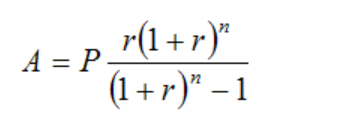  
Formula for calculating monthly payment where A is the payment amount, P is the principal loan amount, r is the apr, and n is the loan term/number of payments

In cases where there was a 0% interest rate, the formula is simply A = P / n

### To translate the encoded fields into one-hot encoded categorical variables, I used the encodings found below in the next section

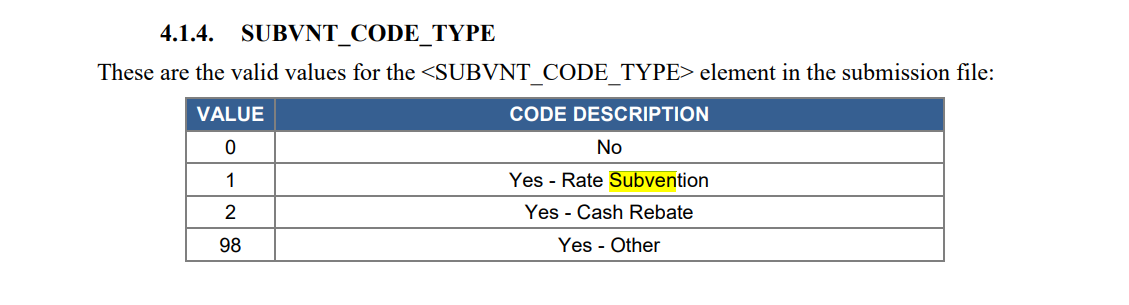

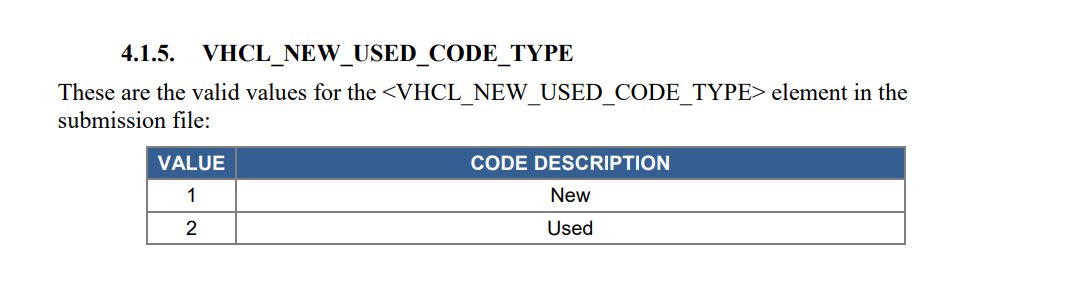

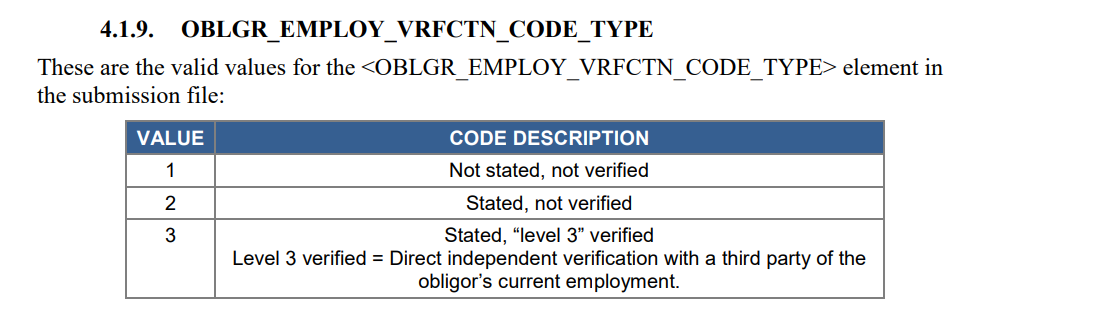

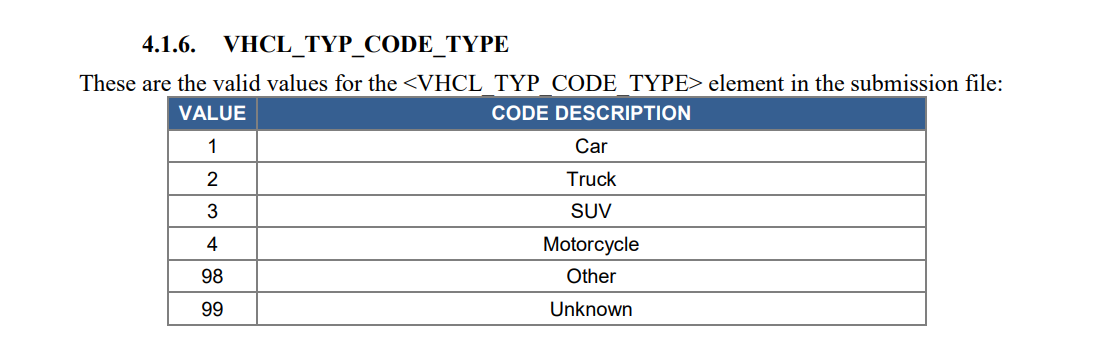

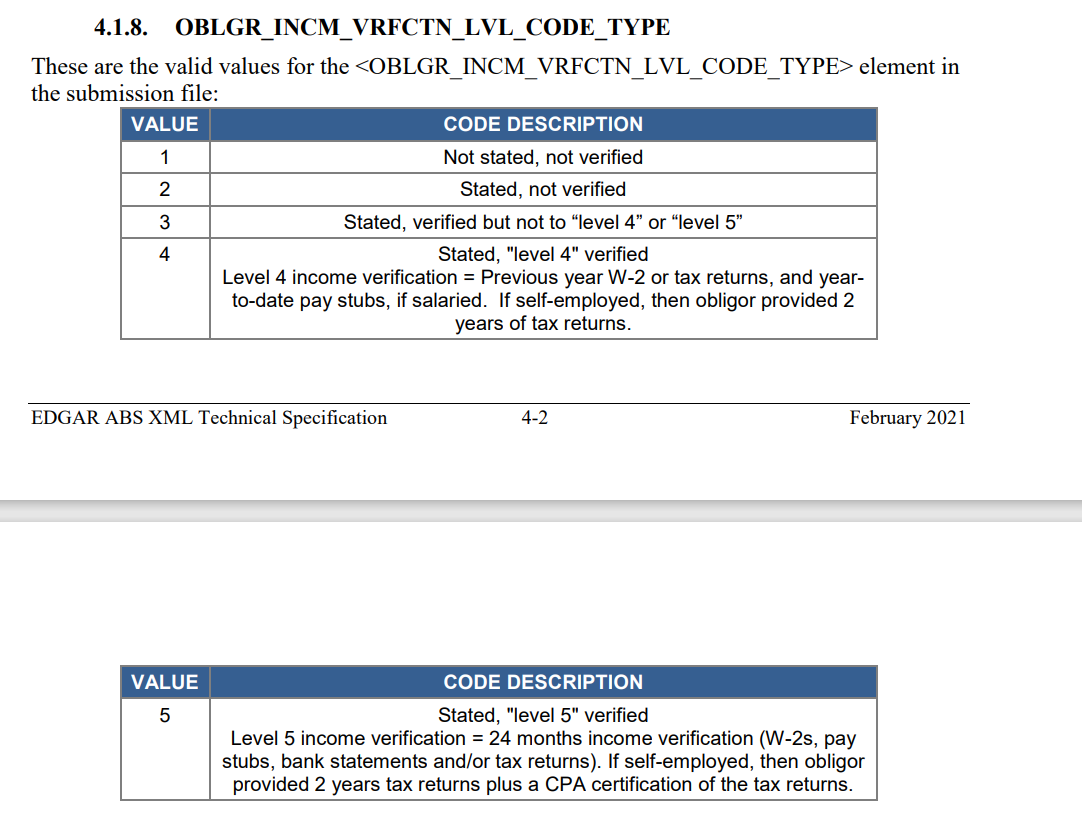

# Data Reshaping

Now that the data is cleaned, I will be performing pivoting to one-hot encode some of the categorical variables:

In [6]:
df = pd.read_csv('../cleaned.csv')
len(df)

c:\users\kevin\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


7855394

In [7]:
df = df.drop_duplicates(subset=['assetNumber'], keep='first', inplace=False, ignore_index=False)
len(df)

7845874

In [8]:
df.head()

,assetNumber,originalLoanAmount,originalLoanTerm,Scheduled Payment Amount,interestRate,creditScore,incomeVerifiedIndicator,usedIndicator,reportingPeriodEndingDate,underwritingIndicator,gracePeriodNumber,subvented,vehicleModelYear,vehicleValueAmount,obligorEmploymentVerificationCode,coObligorIndicator,paymentToIncomePercentage,assetAddedIndicator,vehicleTypeCode,currentDelinquencyStatus
0,785506,13572.08,69,238.996622,0.06923,799,1,1,12/31/2021,1.0,0,0,2009.0,13572.08,2,0,0.0204,0,1.0,0
1,869701,10949.58,72,186.332638,0.06934,735,1,1,12/31/2021,1.0,0,0,2010.0,12849.58,2,0,0.1496,0,1.0,0
2,950447,17208.65,69,357.964206,0.13283,627,1,1,12/31/2021,1.0,0,0,2010.0,17208.65,2,0,0.1180,0,1.0,0
3,871351,25811.33,72,444.408326,0.07350,734,1,1,12/31/2021,1.0,0,0,2011.0,22586.33,2,0,0.1443,0,1.0,0
4,950025,16226.09,72,312.994913,0.11497,670,1,1,12/31/2021,1.0,0,0,2011.0,15431.09,2,0,0.0626,0,1.0,0


In [9]:
df['subvented'].unique()

array(['0', '98', '1', '2', '1;2', '1;98', 0, 1, 2, 98, '2;1'],
      dtype=object)

In [10]:
df['subvented'] = df['subvented'].astype('str')
df['subvented'].unique()

array(['0', '98', '1', '2', '1;2', '1;98', '2;1'], dtype=object)

In [11]:
one_hot = pd.get_dummies(df['subvented'])
df = df.drop('subvented',axis = 1)
df = df.join(one_hot)
df.head()

,assetNumber,originalLoanAmount,originalLoanTerm,Scheduled Payment Amount,interestRate,creditScore,incomeVerifiedIndicator,usedIndicator,reportingPeriodEndingDate,underwritingIndicator,gracePeriodNumber,vehicleModelYear,vehicleValueAmount,obligorEmploymentVerificationCode,coObligorIndicator,paymentToIncomePercentage,assetAddedIndicator,vehicleTypeCode,currentDelinquencyStatus,0,1,1;2,1;98,2,2;1,98
0,785506,13572.08,69,238.996622,0.06923,799,1,1,12/31/2021,1.0,0,2009.0,13572.08,2,0,0.0204,0,1.0,0,1,0,0,0,0,0,0
1,869701,10949.58,72,186.332638,0.06934,735,1,1,12/31/2021,1.0,0,2010.0,12849.58,2,0,0.1496,0,1.0,0,1,0,0,0,0,0,0
2,950447,17208.65,69,357.964206,0.13283,627,1,1,12/31/2021,1.0,0,2010.0,17208.65,2,0,0.1180,0,1.0,0,1,0,0,0,0,0,0
3,871351,25811.33,72,444.408326,0.07350,734,1,1,12/31/2021,1.0,0,2011.0,22586.33,2,0,0.1443,0,1.0,0,1,0,0,0,0,0,0
4,950025,16226.09,72,312.994913,0.11497,670,1,1,12/31/2021,1.0,0,2011.0,15431.09,2,0,0.0626,0,1.0,0,1,0,0,0,0,0,0


In [12]:
# Since the semicolon delimiter represents both category 1 and 2, we can sum up all of the occurrences of a category
# Retrieved these codings from screenshot above
df['rateSubvention'] = df['1'] + df['1;2'] + df['1;98'] + df['2;1']
df['cashRebateSubvention'] = df['2'] + df['1;2'] + df['2;1']
df['otherSubvention'] = df['98'] + df['1;98']
df = df.drop(['0', '1', '1;2', '1;98', '2', '2;1', '98'], axis=1)
df.head()

,assetNumber,originalLoanAmount,originalLoanTerm,Scheduled Payment Amount,interestRate,creditScore,incomeVerifiedIndicator,usedIndicator,reportingPeriodEndingDate,underwritingIndicator,gracePeriodNumber,vehicleModelYear,vehicleValueAmount,obligorEmploymentVerificationCode,coObligorIndicator,paymentToIncomePercentage,assetAddedIndicator,vehicleTypeCode,currentDelinquencyStatus,rateSubvention,cashRebateSubvention,otherSubvention
0,785506,13572.08,69,238.996622,0.06923,799,1,1,12/31/2021,1.0,0,2009.0,13572.08,2,0,0.0204,0,1.0,0,0,0,0
1,869701,10949.58,72,186.332638,0.06934,735,1,1,12/31/2021,1.0,0,2010.0,12849.58,2,0,0.1496,0,1.0,0,0,0,0
2,950447,17208.65,69,357.964206,0.13283,627,1,1,12/31/2021,1.0,0,2010.0,17208.65,2,0,0.1180,0,1.0,0,0,0,0
3,871351,25811.33,72,444.408326,0.07350,734,1,1,12/31/2021,1.0,0,2011.0,22586.33,2,0,0.1443,0,1.0,0,0,0,0
4,950025,16226.09,72,312.994913,0.11497,670,1,1,12/31/2021,1.0,0,2011.0,15431.09,2,0,0.0626,0,1.0,0,0,0,0


In [13]:
df['obligorEmploymentVerificationCode'].unique()

array([2, 1, 3], dtype=int64)

In [14]:
one_hot = pd.get_dummies(df['obligorEmploymentVerificationCode'])
df = df.drop('obligorEmploymentVerificationCode',axis = 1)
df = df.join(one_hot)
df.head()

,assetNumber,originalLoanAmount,originalLoanTerm,Scheduled Payment Amount,interestRate,creditScore,incomeVerifiedIndicator,usedIndicator,reportingPeriodEndingDate,underwritingIndicator,gracePeriodNumber,vehicleModelYear,vehicleValueAmount,coObligorIndicator,paymentToIncomePercentage,assetAddedIndicator,vehicleTypeCode,currentDelinquencyStatus,rateSubvention,cashRebateSubvention,otherSubvention,1,2,3
0,785506,13572.08,69,238.996622,0.06923,799,1,1,12/31/2021,1.0,0,2009.0,13572.08,0,0.0204,0,1.0,0,0,0,0,0,1,0
1,869701,10949.58,72,186.332638,0.06934,735,1,1,12/31/2021,1.0,0,2010.0,12849.58,0,0.1496,0,1.0,0,0,0,0,0,1,0
2,950447,17208.65,69,357.964206,0.13283,627,1,1,12/31/2021,1.0,0,2010.0,17208.65,0,0.1180,0,1.0,0,0,0,0,0,1,0
3,871351,25811.33,72,444.408326,0.07350,734,1,1,12/31/2021,1.0,0,2011.0,22586.33,0,0.1443,0,1.0,0,0,0,0,0,1,0
4,950025,16226.09,72,312.994913,0.11497,670,1,1,12/31/2021,1.0,0,2011.0,15431.09,0,0.0626,0,1.0,0,0,0,0,0,1,0


In [15]:
# From codings in screenshot above
df = df.rename({1: "Not stated, Not Verified Employment", 2: "Stated, Not Verified Employment",
                        3: "Stated, Verified Employment"}, axis=1)
df.head()

,assetNumber,originalLoanAmount,originalLoanTerm,Scheduled Payment Amount,interestRate,creditScore,incomeVerifiedIndicator,usedIndicator,reportingPeriodEndingDate,underwritingIndicator,gracePeriodNumber,vehicleModelYear,vehicleValueAmount,coObligorIndicator,paymentToIncomePercentage,assetAddedIndicator,vehicleTypeCode,currentDelinquencyStatus,rateSubvention,cashRebateSubvention,otherSubvention,"Not stated, Not Verified Employment","Stated, Not Verified Employment","Stated, Verified Employment"
0,785506,13572.08,69,238.996622,0.06923,799,1,1,12/31/2021,1.0,0,2009.0,13572.08,0,0.0204,0,1.0,0,0,0,0,0,1,0
1,869701,10949.58,72,186.332638,0.06934,735,1,1,12/31/2021,1.0,0,2010.0,12849.58,0,0.1496,0,1.0,0,0,0,0,0,1,0
2,950447,17208.65,69,357.964206,0.13283,627,1,1,12/31/2021,1.0,0,2010.0,17208.65,0,0.1180,0,1.0,0,0,0,0,0,1,0
3,871351,25811.33,72,444.408326,0.07350,734,1,1,12/31/2021,1.0,0,2011.0,22586.33,0,0.1443,0,1.0,0,0,0,0,0,1,0
4,950025,16226.09,72,312.994913,0.11497,670,1,1,12/31/2021,1.0,0,2011.0,15431.09,0,0.0626,0,1.0,0,0,0,0,0,1,0


In [16]:
df['vehicleTypeCode'].unique()

array([ 1.,  3.,  4.,  2., 98., 99., nan])

In [17]:
df['vehicleTypeCode'].isna().sum()

1

In [18]:
# 99 is code for unknown
df['vehicleTypeCode'] = df['vehicleTypeCode'].fillna(99)

In [19]:
one_hot = pd.get_dummies(df['vehicleTypeCode'])
df = df.drop('vehicleTypeCode',axis = 1)
df = df.join(one_hot)
df.head()

,assetNumber,originalLoanAmount,originalLoanTerm,Scheduled Payment Amount,interestRate,creditScore,incomeVerifiedIndicator,usedIndicator,reportingPeriodEndingDate,underwritingIndicator,gracePeriodNumber,vehicleModelYear,vehicleValueAmount,coObligorIndicator,paymentToIncomePercentage,assetAddedIndicator,currentDelinquencyStatus,rateSubvention,cashRebateSubvention,otherSubvention,"Not stated, Not Verified Employment","Stated, Not Verified Employment","Stated, Verified Employment",1.0,2.0,3.0,4.0,98.0,99.0
0,785506,13572.08,69,238.996622,0.06923,799,1,1,12/31/2021,1.0,0,2009.0,13572.08,0,0.0204,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,869701,10949.58,72,186.332638,0.06934,735,1,1,12/31/2021,1.0,0,2010.0,12849.58,0,0.1496,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,950447,17208.65,69,357.964206,0.13283,627,1,1,12/31/2021,1.0,0,2010.0,17208.65,0,0.1180,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,871351,25811.33,72,444.408326,0.07350,734,1,1,12/31/2021,1.0,0,2011.0,22586.33,0,0.1443,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,950025,16226.09,72,312.994913,0.11497,670,1,1,12/31/2021,1.0,0,2011.0,15431.09,0,0.0626,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [20]:
# from codings in screenshot above
df = df.rename({1: "Car", 2: "Truck",3: "SUV", 4: "Motorcycle", 98: "Other Vehicle", 99: "Unknown Vehicle"}, axis=1)
df.head()

,assetNumber,originalLoanAmount,originalLoanTerm,Scheduled Payment Amount,interestRate,creditScore,incomeVerifiedIndicator,usedIndicator,reportingPeriodEndingDate,underwritingIndicator,gracePeriodNumber,vehicleModelYear,vehicleValueAmount,coObligorIndicator,paymentToIncomePercentage,assetAddedIndicator,currentDelinquencyStatus,rateSubvention,cashRebateSubvention,otherSubvention,"Not stated, Not Verified Employment","Stated, Not Verified Employment","Stated, Verified Employment",Car,Truck,SUV,Motorcycle,Other Vehicle,Unknown Vehicle
0,785506,13572.08,69,238.996622,0.06923,799,1,1,12/31/2021,1.0,0,2009.0,13572.08,0,0.0204,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,869701,10949.58,72,186.332638,0.06934,735,1,1,12/31/2021,1.0,0,2010.0,12849.58,0,0.1496,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,950447,17208.65,69,357.964206,0.13283,627,1,1,12/31/2021,1.0,0,2010.0,17208.65,0,0.1180,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,871351,25811.33,72,444.408326,0.07350,734,1,1,12/31/2021,1.0,0,2011.0,22586.33,0,0.1443,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,950025,16226.09,72,312.994913,0.11497,670,1,1,12/31/2021,1.0,0,2011.0,15431.09,0,0.0626,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [21]:
df['Defaulted'] = 0
df.loc[df['currentDelinquencyStatus'] >= 90, 'Defaulted'] = 1
df = df.drop('currentDelinquencyStatus', axis = 1)
df = df.drop('assetNumber', axis = 1)
df = df.drop('reportingPeriodEndingDate', axis = 1)
df.head()

,originalLoanAmount,originalLoanTerm,Scheduled Payment Amount,interestRate,creditScore,incomeVerifiedIndicator,usedIndicator,underwritingIndicator,gracePeriodNumber,vehicleModelYear,vehicleValueAmount,coObligorIndicator,paymentToIncomePercentage,assetAddedIndicator,rateSubvention,cashRebateSubvention,otherSubvention,"Not stated, Not Verified Employment","Stated, Not Verified Employment","Stated, Verified Employment",Car,Truck,SUV,Motorcycle,Other Vehicle,Unknown Vehicle,Defaulted
0,13572.08,69,238.996622,0.06923,799,1,1,1.0,0,2009.0,13572.08,0,0.0204,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,10949.58,72,186.332638,0.06934,735,1,1,1.0,0,2010.0,12849.58,0,0.1496,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,17208.65,69,357.964206,0.13283,627,1,1,1.0,0,2010.0,17208.65,0,0.1180,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,25811.33,72,444.408326,0.07350,734,1,1,1.0,0,2011.0,22586.33,0,0.1443,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,16226.09,72,312.994913,0.11497,670,1,1,1.0,0,2011.0,15431.09,0,0.0626,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [22]:
# dropping model year since each loan is from a different time period
df = df.drop('vehicleModelYear', axis=1)
df.head()

,originalLoanAmount,originalLoanTerm,Scheduled Payment Amount,interestRate,creditScore,incomeVerifiedIndicator,usedIndicator,underwritingIndicator,gracePeriodNumber,vehicleValueAmount,coObligorIndicator,paymentToIncomePercentage,assetAddedIndicator,rateSubvention,cashRebateSubvention,otherSubvention,"Not stated, Not Verified Employment","Stated, Not Verified Employment","Stated, Verified Employment",Car,Truck,SUV,Motorcycle,Other Vehicle,Unknown Vehicle,Defaulted
0,13572.08,69,238.996622,0.06923,799,1,1,1.0,0,13572.08,0,0.0204,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,10949.58,72,186.332638,0.06934,735,1,1,1.0,0,12849.58,0,0.1496,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,17208.65,69,357.964206,0.13283,627,1,1,1.0,0,17208.65,0,0.1180,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,25811.33,72,444.408326,0.07350,734,1,1,1.0,0,22586.33,0,0.1443,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,16226.09,72,312.994913,0.11497,670,1,1,1.0,0,15431.09,0,0.0626,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [23]:
# To reduce noise, remove Motorcycle, Other Vehicle, and Unknown Vehicle as these loans are 
# different from Car, Truck and SUV loans
df = df[df['Motorcycle'] != 1]
df = df.drop('Motorcycle', axis=1)
df = df[df['Unknown Vehicle'] != 1]
df = df.drop('Unknown Vehicle', axis=1)
df = df[df['Other Vehicle'] != 1]
df = df.drop('Other Vehicle', axis=1)

In [24]:
df = df.dropna()
df.to_csv("../preprocessed.csv", index=False)